# Phylogenetic Tree Construction with Biopython
In this code flow, a phylogenetic tree from three DNA sequences will be generated using the Biopython dependency. The steps involved will be to process the sequences from a FASTA file, calculate a distance matrix, and then construct the phylogenetic tree.

## Input Sequences in FASTA format
Example three sequences in a file `sequences.fasta`:
````
>sequence_1
ATCGTACGATCGTACGATCG
>sequence_2
ATCGTTCGATCGTCCGATCG
>sequence_3
ATGGTACGATCGGACGATCA
>sequence_4
GTCGTACGGTAGTACGATCG
>sequence_5
ATCGGACGATCGTTCGATCG
>sequence_6
GTTGTACGATCGTACGGTCA
>sequence_7
ATCGTACGGTCGTACGTTCA
>sequence_8
GTGGTACGATCGTACGATCA

````

### Step 1: Import Libraries and Read the Input File

In [5]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo

input_file = 'sequences.fasta'
alignment = AlignIO.read(input_file, 'fasta')

### Step 2: Calculate the Distance Matrix

In [6]:
calculator = DistanceCalculator('identity')  # using identity model for simple distance calculation
distance_matrix = calculator.get_distance(alignment)
print('Distance Matrix:', distance_matrix)

Distance Matrix: sequence_1  0.000000
sequence_2  0.100000    0.000000
sequence_3  0.150000    0.250000    0.000000
sequence_4  0.150000    0.250000    0.300000    0.000000
sequence_5  0.100000    0.150000    0.250000    0.250000    0.000000
sequence_6  0.200000    0.300000    0.200000    0.250000    0.300000    0.000000
sequence_7  0.150000    0.250000    0.200000    0.200000    0.250000    0.200000    0.000000
sequence_8  0.150000    0.250000    0.100000    0.200000    0.250000    0.100000    0.200000    0.000000
    sequence_1  sequence_2  sequence_3  sequence_4  sequence_5  sequence_6  sequence_7  sequence_8


### Step 3: Construct the Phylogenetic Tree

In [7]:
constructor = DistanceTreeConstructor(calculator, method='nj')
phylo_tree = constructor.build_tree(alignment)
phylo_tree.rooted = True

### Step 4: Visualize and Save the Tree

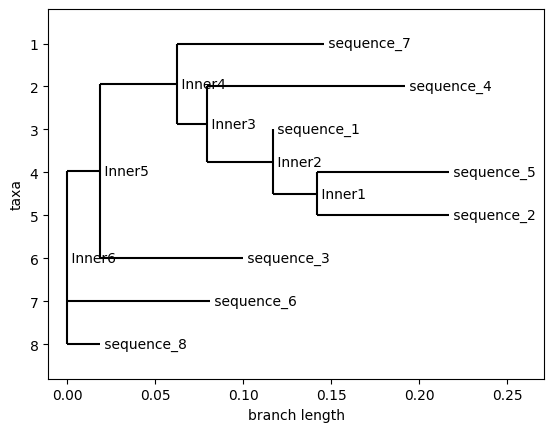

1

In [8]:
Phylo.draw(phylo_tree)
Phylo.write(phylo_tree, 'phylogenetic_tree.xml', 'phyloxml')